In [ ]:
# import packages
import pandas as pd
import os

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# import data set
df = pd.read_csv('/content/drive/MyDrive/DSBA 6211/Amtrak.csv')
df.describe(include = "all")

,Month,Ridership
count,159,159.000000
unique,159,NaN
top,1/1/1991,NaN
freq,1,NaN
mean,NaN,1822.197208
std,NaN,181.636034
min,NaN,1360.852000
25%,NaN,1698.564500
50%,NaN,1831.049000
75%,NaN,1966.957500


In [ ]:
df.dtypes

Month         object
Ridership    float64
dtype: object

In [ ]:
df['Date']=pd.to_datetime(df.Month, format='%d/%m/%Y')

In [ ]:
df

,Month,Ridership,Date
0,1/1/1991,1708.917,1991-01-01
1,1/2/1991,1620.586,1991-02-01
2,1/3/1991,1972.715,1991-03-01
3,1/4/1991,1811.665,1991-04-01
4,1/5/1991,1974.964,1991-05-01
...,...,...,...
154,1/11/2003,2076.054,2003-11-01
155,1/12/2003,2140.677,2003-12-01
156,1/1/2004,1831.508,2004-01-01
157,1/2/2004,1838.006,2004-02-01


In [ ]:
df.dtypes

Month                object
Ridership           float64
Date         datetime64[ns]
dtype: object

In [ ]:
df.Ridership.values

array([1708.917, 1620.586, 1972.715, 1811.665, 1974.964, 1862.356,
       1939.86 , 2013.264, 1595.657, 1724.924, 1675.667, 1813.863,
       1614.827, 1557.088, 1891.223, 1955.981, 1884.714, 1623.042,
       1903.309, 1996.712, 1703.897, 1810.   , 1861.601, 1875.122,
       1705.259, 1618.535, 1836.709, 1957.043, 1917.185, 1882.398,
       1933.009, 1996.167, 1672.841, 1752.827, 1720.377, 1734.292,
       1563.365, 1573.959, 1902.639, 1833.888, 1831.049, 1775.755,
       1867.508, 1906.608, 1685.632, 1778.546, 1775.995, 1783.35 ,
       1548.415, 1496.925, 1798.316, 1732.895, 1772.345, 1761.207,
       1791.655, 1874.82 , 1571.309, 1646.948, 1672.631, 1656.845,
       1381.758, 1360.852, 1558.575, 1608.42 , 1696.696, 1693.183,
       1835.516, 1942.573, 1551.401, 1686.508, 1576.204, 1700.433,
       1396.588, 1371.69 , 1707.522, 1654.604, 1762.903, 1775.8  ,
       1934.219, 2008.055, 1615.924, 1773.91 , 1732.368, 1796.626,
       1570.33 , 1412.691, 1754.641, 1824.932, 1843.289, 1825.

In [ ]:
# generate time series data in python
rider_ts = pd.Series(df.Ridership.values,
                     index=df.Date,
                     name='Ridership')
rider_ts

Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
                ...   
2003-11-01    2076.054
2003-12-01    2140.677
2004-01-01    1831.508
2004-02-01    1838.006
2004-03-01    2132.446
Name: Ridership, Length: 159, dtype: float64

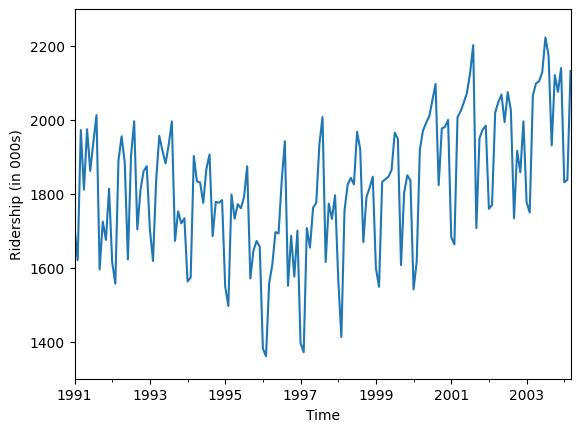

In [ ]:
import matplotlib.pylab as plt
ax=rider_ts.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Ridership (in 000s)')
ax.set_ylim(1300,2300)
plt.show()

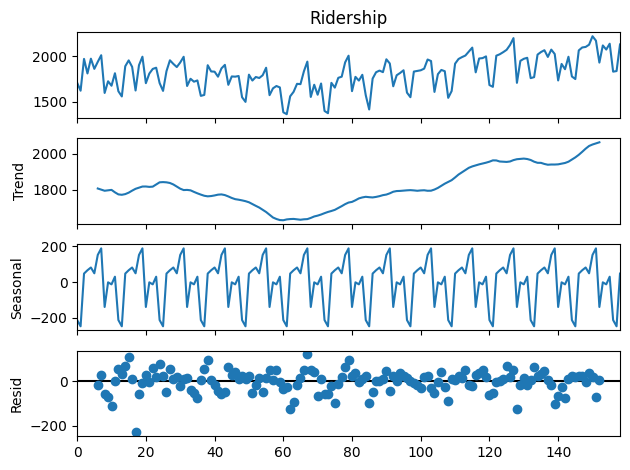

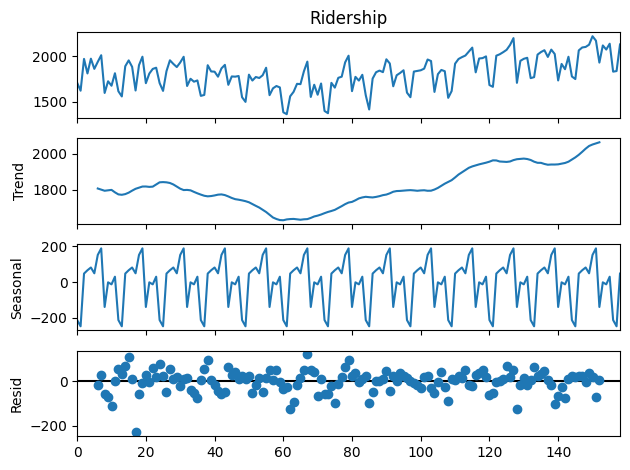

In [ ]:
# time series seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(df['Ridership'], model='additive', period=12)
result.plot()

In [ ]:
# separate into training and validation
nValid = 36
nTrain = len(rider_ts)-nValid

train_ts =rider_ts[:nTrain]
valid_ts =  rider_ts[nTrain:]

In [ ]:
train_ts
valid_ts

Date
2001-04-01    2023.792
2001-05-01    2047.008
2001-06-01    2072.913
2001-07-01    2126.717
2001-08-01    2202.638
2001-09-01    1707.693
2001-10-01    1950.716
2001-11-01    1973.614
2001-12-01    1984.729
2002-01-01    1759.629
2002-02-01    1770.595
2002-03-01    2019.912
2002-04-01    2048.398
2002-05-01    2068.763
2002-06-01    1994.267
2002-07-01    2075.258
2002-08-01    2026.560
2002-09-01    1734.155
2002-10-01    1916.771
2002-11-01    1858.345
2002-12-01    1996.352
2003-01-01    1778.033
2003-02-01    1749.489
2003-03-01    2066.466
2003-04-01    2098.899
2003-05-01    2104.911
2003-06-01    2129.671
2003-07-01    2223.349
2003-08-01    2174.360
2003-09-01    1931.406
2003-10-01    2121.470
2003-11-01    2076.054
2003-12-01    2140.677
2004-01-01    1831.508
2004-02-01    1838.006
2004-03-01    2132.446
Name: Ridership, dtype: float64

In [ ]:
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools

ts_df = tsatools.add_trend(rider_ts, trend='t')
ts_df['Month'] = ts_df.index.month

ts_df

,Ridership,trend,Month
Date,,,
1991-01-01,1708.917,1.0,1
1991-02-01,1620.586,2.0,2
1991-03-01,1972.715,3.0,3
1991-04-01,1811.665,4.0,4
1991-05-01,1974.964,5.0,5
...,...,...,...
2003-11-01,2076.054,155.0,11
2003-12-01,2140.677,156.0,12
2004-01-01,1831.508,157.0,1


In [ ]:
# linear trend

train_df = ts_df[:nTrain]
valid_df = ts_df[nTrain:]

rider_lm = sm.ols(formula='Ridership~trend',data=train_df).fit()

rider_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7456
Date:                Mon, 15 Apr 2024   Prob (F-statistic):              0.390
Time:                        16:34:00   Log-Likelihood:                -797.95
No. Observations:                 123   AIC:                             1600.
Df Residuals:                     121   BIC:                             1606.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1750.3595     29.073     60.206      0.000    1692.802    1807.917
trend          0.3514      0.407      0.864      0.390      -0.454       1.157
==============================================================================
Omnibus:                        4.293   Durbin-Watson:                   1.110
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                4.340
Skew:                          -0.435   Prob(JB):                        0.114
Kurtosis:                       2.700   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 25.2 MB/s eta 0:00:00


In [ ]:

from dmba import regressionSummary

predict_lm = rider_lm.predict(valid_df)
regressionSummary(valid_ts,predict_lm)


Colab environment detected.

Regression statistics

                      Mean Error (ME) : 193.1316
       Root Mean Squared Error (RMSE) : 239.4863
            Mean Absolute Error (MAE) : 209.4371
          Mean Percentage Error (MPE) : 9.2099
Mean Absolute Percentage Error (MAPE) : 10.1477


In [ ]:
# quadratic trend
import numpy as np

rider_lm_poly = sm.ols(formula='Ridership~trend+np.square(trend)',
                       data=train_df).fit()

rider_lm_poly.summary()

predict_lm_poly = rider_lm_poly.predict(valid_df)
regressionSummary(valid_ts,predict_lm_poly)


Regression statistics

                      Mean Error (ME) : -83.9621
       Root Mean Squared Error (RMSE) : 179.8494
            Mean Absolute Error (MAE) : 133.7383
          Mean Percentage Error (MPE) : -4.7254
Mean Absolute Percentage Error (MAPE) : 7.0757


In [ ]:
# Seasonality
rider_lm_season = sm.ols(formula='Ridership~C(Month)',data=train_df).fit()
rider_lm_season.summary()

predict_lm_season =rider_lm_season.predict(valid_df)
regressionSummary(valid_ts,predict_lm_season)



Regression statistics

                      Mean Error (ME) : 217.9267
       Root Mean Squared Error (RMSE) : 229.6509
            Mean Absolute Error (MAE) : 217.9267
          Mean Percentage Error (MPE) : 10.8646
Mean Absolute Percentage Error (MAPE) : 10.8646


In [ ]:
# trend + seasonality

modelfomula = 'Ridership~trend+np.square(trend)+C(Month)'
rider_lm_trendseason = sm.ols(formula=modelfomula,
                              data=train_df).fit()
rider_lm_trendseason.summary()

predict_lm_trendseason = rider_lm_trendseason.predict(valid_df)
regressionSummary(valid_ts, predict_lm_trendseason)


Regression statistics

                      Mean Error (ME) : -126.1654
       Root Mean Squared Error (RMSE) : 153.2507
            Mean Absolute Error (MAE) : 131.7250
          Mean Percentage Error (MPE) : -6.4315
Mean Absolute Percentage Error (MAPE) : 6.6987


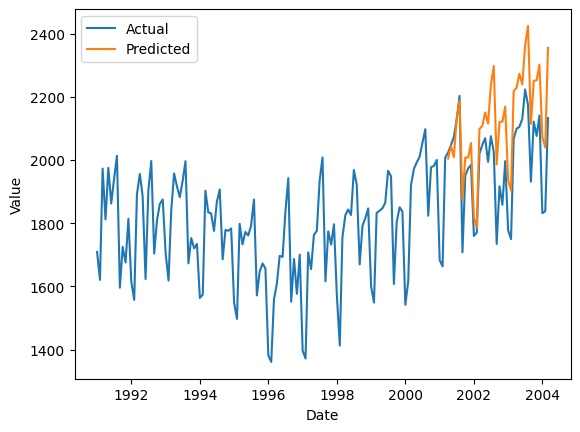

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual time series data
plt.plot(rider_ts.index, rider_ts, label='Actual')

# Plot the predicted time series data
plt.plot(predict_lm_trendseason.index, predict_lm_trendseason, label='Predicted')

# Add axis labels and a legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()


In [ ]:
# smoothing method
ma = train_ts.rolling(12).mean()
ma

Date
1991-01-01            NaN
1991-02-01            NaN
1991-03-01            NaN
1991-04-01            NaN
1991-05-01            NaN
                 ...     
2000-11-01    1901.808000
2000-12-01    1915.451167
2001-01-01    1927.241833
2001-02-01    1931.114833
2001-03-01    1938.480667
Name: Ridership, Length: 123, dtype: float64

In [ ]:
last_ma = ma[-1]

predict_ma = pd.Series(last_ma,index=valid_ts.index)
combine_ma = pd.concat([ma, predict_ma])

print(ma)

Date
1991-01-01            NaN
1991-02-01            NaN
1991-03-01            NaN
1991-04-01            NaN
1991-05-01            NaN
                 ...     
2000-11-01    1901.808000
2000-12-01    1915.451167
2001-01-01    1927.241833
2001-02-01    1931.114833
2001-03-01    1938.480667
Name: Ridership, Length: 123, dtype: float64


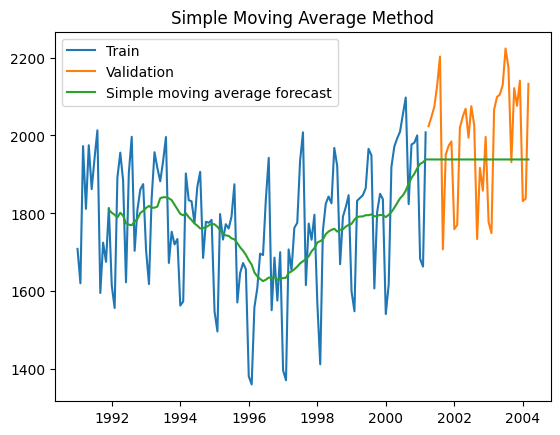

In [ ]:
# plot moving average
plt.plot(train_ts, label='Train')
plt.plot(valid_ts, label='Validation')
plt.plot(combine_ma, label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [ ]:
regressionSummary(valid_ts,predict_ma)


Regression statistics

                      Mean Error (ME) : 54.7296
       Root Mean Squared Error (RMSE) : 152.1767
            Mean Absolute Error (MAE) : 135.1550
          Mean Percentage Error (MPE) : 2.2278
Mean Absolute Percentage Error (MAPE) : 6.7771


In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
SES = SimpleExpSmoothing(train_ts,
                         initialization_method='estimated').fit() # estimated method is used, which estimates the initial smoothing level based on the data; which finds the value of alpha that minimizes the sum of squared errors between the predicted and actual values
predict_SES = SES.forecast(len(valid_ts))

SES.model.params

regressionSummary(valid_ts, predict_SES)

combine_SES = pd.concat([SES.fittedvalues, predict_SES])


Regression statistics

                      Mean Error (ME) : 109.0024
       Root Mean Squared Error (RMSE) : 179.0082
            Mean Absolute Error (MAE) : 160.6923
          Mean Percentage Error (MPE) : 4.9651
Mean Absolute Percentage Error (MAPE) : 7.9063


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
